In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pyiast as iast
import numpy as np
import ternary as tern
import math
import warnings
import numdifftools as ndt

In [2]:
data_xe = pd.read_csv("data/experimental_isotherm_data/NiPyC2/NiPyC2_Xe_T_298.csv").iloc[0:28]
data_xe;

In [3]:
data_kr = pd.read_csv("data/experimental_isotherm_data/NiPyC2/NiPyC2_Kr_T_298.csv").iloc[0:28]
data_kr;

In [4]:
data_mnh2_xe = pd.read_csv("data/experimental_isotherm_data/NiPyC2/NiPyC2-mNH2_Xe_T_298.csv").iloc[0:28]
data_mnh2_xe;

In [5]:
data_mnh2_kr = pd.read_csv("data/experimental_isotherm_data/NiPyC2/NiPyC2-mNH2_Kr_T_298.csv").iloc[0:28]
data_mnh2_kr;

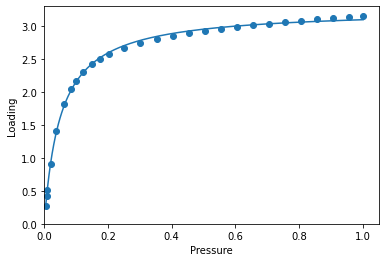

In [6]:
model_xe = iast.ModelIsotherm(data_xe, loading_key="loading (mmol/g)", 
                              pressure_key="pressure (bar)", model="Langmuir")

# model_xe = iast.InterpolatorIsotherm(data_xe, loading_key="loading (mmol/g)", 
#                                      pressure_key="pressure (bar)",
#                                      fill_value=data_xe["loading (mmol/g)"].max())

iast.plot_isotherm(model_xe)

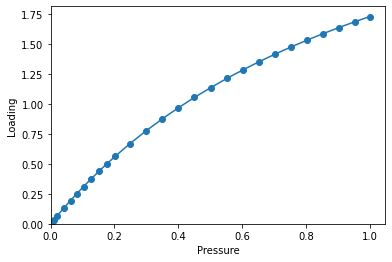

In [7]:
model_kr = iast.ModelIsotherm(data_kr, loading_key="loading (mmol/g)", 
                              pressure_key="pressure (bar)", model="Langmuir")

# model_kr = iast.InterpolatorIsotherm(data_kr, loading_key="loading (mmol/g)", 
#                                      pressure_key="pressure (bar)",
#                                      fill_value=data_kr["loading (mmol/g)"].max())

iast.plot_isotherm(model_kr)

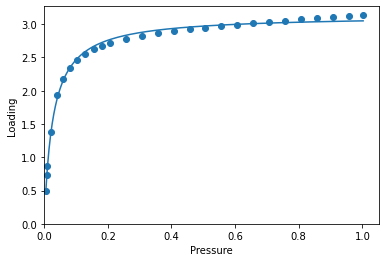

In [8]:
model_mnh2_xe = iast.ModelIsotherm(data_mnh2_xe, loading_key="loading (mmol/g)", 
                              pressure_key="pressure (bar)", model="Langmuir")

# model_mnh2_xe = iast.InterpolatorIsotherm(data_mnh2_xe, loading_key="loading (mmol/g)", 
#                                           pressure_key="pressure (bar)", 
#                                           fill_value=data_mnh2_xe["loading (mmol/g)"].max())

iast.plot_isotherm(model_mnh2_xe)

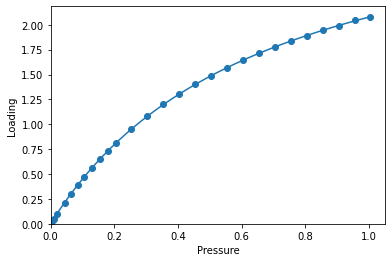

In [9]:
model_mnh2_kr = iast.ModelIsotherm(data_mnh2_kr, loading_key="loading (mmol/g)", 
                              pressure_key="pressure (bar)", model="Langmuir")

# model_mnh2_kr = iast.InterpolatorIsotherm(data_mnh2_kr, loading_key="loading (mmol/g)", 
#                                           pressure_key="pressure (bar)", 
#                                           fill_value=data_kr["loading (mmol/g)"].max())

iast.plot_isotherm(model_mnh2_kr)

In [10]:
y = np.array([0.2, 0.8])
y

array([0.2, 0.8])

In [11]:
pressures = np.linspace(0.001, 1)
pressures

array([0.001     , 0.02138776, 0.04177551, 0.06216327, 0.08255102,
       0.10293878, 0.12332653, 0.14371429, 0.16410204, 0.1844898 ,
       0.20487755, 0.22526531, 0.24565306, 0.26604082, 0.28642857,
       0.30681633, 0.32720408, 0.34759184, 0.36797959, 0.38836735,
       0.4087551 , 0.42914286, 0.44953061, 0.46991837, 0.49030612,
       0.51069388, 0.53108163, 0.55146939, 0.57185714, 0.5922449 ,
       0.61263265, 0.63302041, 0.65340816, 0.67379592, 0.69418367,
       0.71457143, 0.73495918, 0.75534694, 0.77573469, 0.79612245,
       0.8165102 , 0.83689796, 0.85728571, 0.87767347, 0.89806122,
       0.91844898, 0.93883673, 0.95922449, 0.97961224, 1.        ])

In [12]:
selectivity = np.zeros((2, 50))
selectivity

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

In [13]:
models = [[model_xe, model_kr], 
          [model_mnh2_xe, model_mnh2_kr]]

for j in range(2):
    for i in range(50):
        p = pressures[i] * y
        q = iast.iast(p, models[j])
        selectivity[j][i] = (q[0] / q[1]) / (y[0] / y[1])

                      Component 1: p^0 = 1.015070 > 0.999822, the highest pressure
                      exhibited in the pure-component isotherm data. Thus,
                      pyIAST had to extrapolate the isotherm data to achieve
                      this IAST result.
                      Component 1: p^0 = 1.104164 > 0.999822, the highest pressure
                      exhibited in the pure-component isotherm data. Thus,
                      pyIAST had to extrapolate the isotherm data to achieve
                      this IAST result.
                      Component 1: p^0 = 1.192904 > 0.999822, the highest pressure
                      exhibited in the pure-component isotherm data. Thus,
                      pyIAST had to extrapolate the isotherm data to achieve
                      this IAST result.
                      Component 1: p^0 = 1.281306 > 0.999822, the highest pressure
                      exhibited in the pure-component isotherm data. Thus,
                 

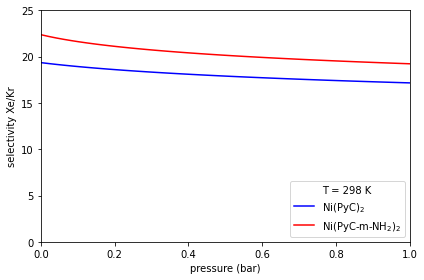

In [14]:
plt.figure()
plt.plot(pressures, selectivity[0], c="b", label=r"Ni(PyC)$_2$")
plt.plot(pressures, selectivity[1], c="r", label=r"Ni(PyC-m-NH$_2$)$_2$")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 25.0])

plt.legend(loc="lower right", title="T = 298 K")
plt.xlabel("pressure (bar)")
plt.ylabel("selectivity Xe/Kr")
# plt.title("InterpolatorIsotherm")

plt.tight_layout()
plt.savefig("selectivity_vs_pressure_comparison.pdf", dpi=600, format="pdf")